<a href="https://colab.research.google.com/github/majorquev/DBDC_202409_Programacion_en_R_para_ciencia_de_datos/blob/main/Evaluaciones/C2/Control2_pauta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Control 2 Pauta


# Sección 1

En la ruta `./datasets` se encuentran los siguientes arhivos, correspondiente a un sondeo de distintos restaurants del estado de California (CA) de EE.UU y sus valoraciones.
El archivo `generalinfo.csv` contiene información propia del restaurant, como tipo de comida ofrecida y valoración de los clientes entre otros.

* `id_restaurant`: Identificador del restaurant valorado.
* `label`: Nombre del restaurant.
* `food_type`: Tipo de comida ofrecida por el restaurant.
* `review`: Calificación promedio del restaurant otorgada por los usuarios. (valor entre 0 y 1)

Por otra parte, la información contenida en el archivo `location.csv` es la siguiente:

* `id_rest`: Identificador del restaurant valorado.
* `street_num`: Numeración de la ubicación del restaurant.
* `street_name`: Nombre de la calle donde está ubicado el restaurant.
* `city`: Ciudad donde se ubica el restaurant.
* `county_name`: Condado.
* `lat`: Latitud de la dirección.
* `lng`: Longitud de la dirección.
Note que ambas tablas están relacionadas a través de los campos `id_restaurant` y `id_rest`.

## Preliminar
**(1pt)** Cargue los archivos indicados previamente en dos variables, una llamada `general` y otra `location` para  `generalinfo.csv` y `location.csv` respectivamente.

In [ ]:
#########
## Esto  no es necesaria en Rstudio, es sólo para modificar el tamaño de los gráficos desplegados en el notebook
library(repr)
options(repr.plot.width=12, repr.plot.height=12)
#########

## Carga de archivos
general <- read.csv("https://raw.githubusercontent.com/majorquev/DBDC_202409_Programacion_en_R_para_ciencia_de_datos/main/Evaluaciones/C2/datasets/generalinfo.csv")
location <- read.csv("https://raw.githubusercontent.com/majorquev/DBDC_202409_Programacion_en_R_para_ciencia_de_datos/main/Evaluaciones/C2/datasets/location.csv")


head(general,10);head(location,10)

#carga de lbrerías
library(dplyr)
library(ggplot2)

,id_restaurant,label,food_type,review
,<int>,<chr>,<chr>,<dbl>
1,1,sparky's diner,24 hour diner,2.3
2,2,kabul afghan cuisine,afghani,3.8
3,3,helmand restaurant,afghani,4.0
4,4,afghani house,afghani,3.6
5,5,kabul afghan cusine,afghani,3.7
6,6,bamyan afghan restaurant,afghani,2.8
7,7,kabul palace,afghani,2.8
8,8,kandahar,afghani,3.5
9,9,kabobs house,afghani,2.7


,id_rest,street_num,street_name,city
,<int>,<int>,<chr>,<chr>
1,1,242,church st,san francisco
2,2,135,el camino real,san carlos
3,3,430,broadway,san francisco
4,4,1103,e. el camino real,sunnyvale
5,5,833,w. el camino real,sunnyvale
6,6,NA,,san rafael
7,7,155,san fernando,san jose
8,8,2118,mt diablo st,concord
9,9,3005,alamo drive (corner nut tree),vacaville



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Preguntas 1.1

**P1a) (1pt)** Basándose en a tabla _general_, ¿cuántos restaurants (id's) distintos hay en total?<br>
**P1b) (1pt)** ¿En cuántos tipos de comida diferentes se clasifican los restaurants?<br>
**P1c) (2pt)** ¿Cuántas ciudades distintas considera el sondeo?<br>
**P1d) (2pt)** ¿Indique el tipo de comida y las ciudades donde se encuentra el restaurant "great wall restaurant"?<br>
**P1e) (2pt)** ¿Cuántos restaurantes de la ciudad de _san francisco_ tienen calificación mayor o igual a 3.8 y venden comida vegetariana (_vegetarian_) ?<br>

In [ ]:
# P1.1
## Respusta
#a) ---------------------------------------------------------------------
length(unique(general$id_restaurant))# 9590 restaurants
# También se considerarán los nombres distintos.
#b) ---------------------------------------------------------------------
length(unique(general$food_type)) # 145 tipos de comida distintos
#c) ---------------------------------------------------------------------
length(unique(location$city[!is.na(location$city)])) #167  ciudades distintas
#d) ---------------------------------------------------------------------
# Si no se explicita el uso de la funciónleft_join, igual se obtiene puntaje copleto. La utilización correcta de esta función se evalúa más adelante.
# se descuenta un punto si no indica correctamente las ciudades.
general %>%
    filter(label == "great wall restaurant") %>%
    left_join(location,by = c("id_restaurant" = "id_rest"))
# Tipo de comida: chinese, ciudades donde se ubica: San Francisco y San leandro.
#e) ---------------------------------------------------------------------
general %>%
    left_join(location,by = c("id_restaurant" = "id_rest")) %>%
    filter(city == "san francisco" & review >= 3.8 & food_type == "vegetarian" ) %>%
    nrow() # 3 restaurants

[1] 9590

[1] 145

[1] 167

id_restaurant,label,food_type,review,street_num,street_name,city
<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>
3472,great wall restaurant,chinese,2.0,4542,irving,san francisco
3593,great wall restaurant,chinese,2.5,15048,farnsworth st,san leandro


[1] 3

## Preguntas 1.2

**P2a) (2pt)** Sin considerar San Francisco, ¿cuál es la ciudad con mayor cantidad de restaurantes sondeados?<br>
**P2b) (1pt)** ¿Cuáles son los 3 tipos de comida ofrecido más comunes ?<br>
**P2c) (2pt)** Sin con siderar San Francisco, ¿Cuáles son las 3 ciudades con mayor cantidad de restaurants que ofrecen comido tipo _japanese_?<br>
**P2d) (2pt)** Usted decide viajar a una de las ciudades en cuestión, para ello calcula el promedio de las valoraciones medias (promedio de _review_) por cada ciudad, y escoje aquella con mayor review promedio. ¿Qué ciudad escoge? <br>
**P2e) (2pt)** Cuál es la ciudad con mejor valoración promedio de restaurantes tipo "barbeque"<br>


In [ ]:
# P1.2
## Respusta
#a) ---------------------------------------------------------------------
general %>%
    left_join(location,by = c("id_restaurant" = "id_rest")) %>%
    filter(city != "san francisco") %>%
    count(city) %>%
    arrange(-n) %>%
    head(1) # la ciudad con mayor número de restaurants es san jose, sin considerar san francisco.
#b) ---------------------------------------------------------------------
general %>%
    count(food_type) %>%
    arrange(-n) %>%
    head(3) # café, comida china y pizza.
#c) ---------------------------------------------------------------------
general %>%
    left_join(location,by = c("id_restaurant" = "id_rest")) %>%
    filter(city != "san francisco" & food_type == "japanese") %>%
    count(city) %>%
    arrange(-n) %>%
    head(3) # san jose, berkeley y oakland
#d) ---------------------------------------------------------------------
general %>%
    left_join(location,by = c("id_restaurant" = "id_rest")) %>%
    group_by(city) %>%
    summarise(review_prom = mean(review)) %>%
    arrange(-review_prom) %>%
    head(1) # la ciudad de cerritos es la ciudad con mayor valoración promedio.
#e) ---------------------------------------------------------------------
#OPCION 1 (filtrar y luego agrupar)
general %>%
    filter(food_type == "barbeque") %>%
    left_join(location,by = c("id_restaurant" = "id_rest")) %>%
    group_by(city) %>%
    summarise(review_prom = mean(review)) %>%
    arrange(-review_prom) %>%
    head(1) #pleasant hill con review_prom 3.7

#OPCION2 (agrupar y luego filtrar)
general %>%
    left_join(location,by = c("id_restaurant" = "id_rest")) %>%
    group_by(city,food_type) %>%
    summarise(review_prom = mean(review)) %>%
    filter(food_type == "barbeque") %>%
    arrange(-review_prom) %>%
    head(1) #pleasant hill con review_prom 3.7

,city,n
,<chr>,<int>
1,san jose,933


,food_type,n
,<chr>,<int>
1,cafe,1098
2,chinese,1075
3,pizza,959


,city,n
,<chr>,<int>
1,san jose,28
2,berkeley,14
3,oakland,14


city,review_prom
<chr>,<dbl>
cerritos,3.8


city,review_prom
<chr>,<dbl>
pleasant hill,3.7


`summarise()` has grouped output by 'city'. You can override using the
`.groups` argument.


city,food_type,review_prom
<chr>,<chr>,<dbl>
pleasant hill,barbeque,3.7


## Preguntas 1.3
**P3a) (4pt)** En la pregunta 1d), se pudo observar que un mismo restaurant puede estar presente en más de una ciudad. ¿Cuántos restaurants tienen esta característica, es decir están en más de una ciudad **distinta** ? De ser de utilidad puede investigar y utilizar la función `distinct()`.<br>


**NOTA:** Si bien no es parte del objetivo de este taller, en ocasiones es necesario depurar la información obtenida a modo de trabajar con datos consistentes. En este análisis, en la tabla general, existen nombres de restaurantes que se peuden escribir de distinta manera (incluso con faltas de ortografía), por ejemplo:

  * `"1/4 pound giant burger"` y  `"1/4 pound giant burgers"`
  * `"3.6.9. shanghai restaurant"` y `"3 6 9 shanghai restaurant"`
  * `"zorba's pizza"` y `"zorbas pizza"`

Casos como estos existen muchos en nuestra tabla, pero para nuestros efectos **consideraremos como nombres distintos a aquellos casos como los mencionados anteriormente**.

Una manera de abordar este tipo de inconsistencias es necesario en muchos casos la inclusión de diccionarios y de herramientas que nos permitan manipular texto, e incluso medir el nivel de similitud entre frases.

A modo de ejemplo, se pueden eliminar los puntos, apóstrofes, guiones y otros caracteres de la siguiente manera:

````````
general %>%
    mutate(label = tolower(label)) %>% # se deja todo en minúsculas
    mutate(label = gsub("'","", label)) %>% # se reemplaza "'" por ""  
    mutate(label = gsub(" ","_",label)) %>% # se reemplazan los espacios " " por "_"
    mutate(label = chartr("áéíóú", "aeiou", label)) %>% head() # se eliminan las tildes
````````

De ser de interés, pueden obtener más info sobre manipulación de textos y modelamiento en la siguiente referencia [https://www.tidytextmining.com/](https://www.tidytextmining.com/).<br>
Package para medir similitud entre **palabras**: `stringdist`

<br>

**P3b) (2pt)** ¿Cuál es el restaurant que tiene presencia en la mayor cantidad de **ciudades distintas**?¿En cuántas ciudades está presente?<br>
**P3c) (5pt)** Diremos que un restaurant posee _sucursales_ si en la tabla `general` existe más de un registro con el mismo `label`. Muestre, mediante un gráfico de barras, los 15 restaurants con  mayor cantidad de _sucursales_, donde la altura de la barra representa el total de sucursales de cada restaurant. Su gráfico debe contemplar al menos los siguientes aspectos:
 * Debe contener un título.
 * Debe incluir nombres sugerentes en los ejes.
 * Los nombres de los restaurants deben ser legibles.
 * Los restaurants deben ir ordenados según su cantidad de sucursales.
 * Incluya tiquetas en la parte superior de cada barra, que muestre la cantidad de sucursales respectivas.
 * Las leyendas de cada gráfico no deben visualizarse

Como ayuda, puede ser de utilidad investigar la usabilidad de las siguientes funciones de ggplot2.
  * `labs()`: Para la inclusión de nombres en los ejes, títulos, leyenda etc.
  * `geom_label()`; `geom_text()`: para añadir etiquetas esobre las gráficas.
  * `reorder()`: Para reordenar una variable en la función `aes()`.
  * `coord_flip()`: Para invertir ejes.
  * `theme()` en conjunto con `element_text()`: Permite modificar el tema de visualización. Por ejemplo, la siguiente instrucción muestra las etiquetas del eje x con una orientacíón en 45 grados respecto de la posición original:

  ````````
grafico_ggplot +
    theme(axis.text.x=element_text(angle = 45, vjust = .5,hjust = 1))
  ````````

 A modo de ejemplo puede tener como referencia los siguientes gráficos.



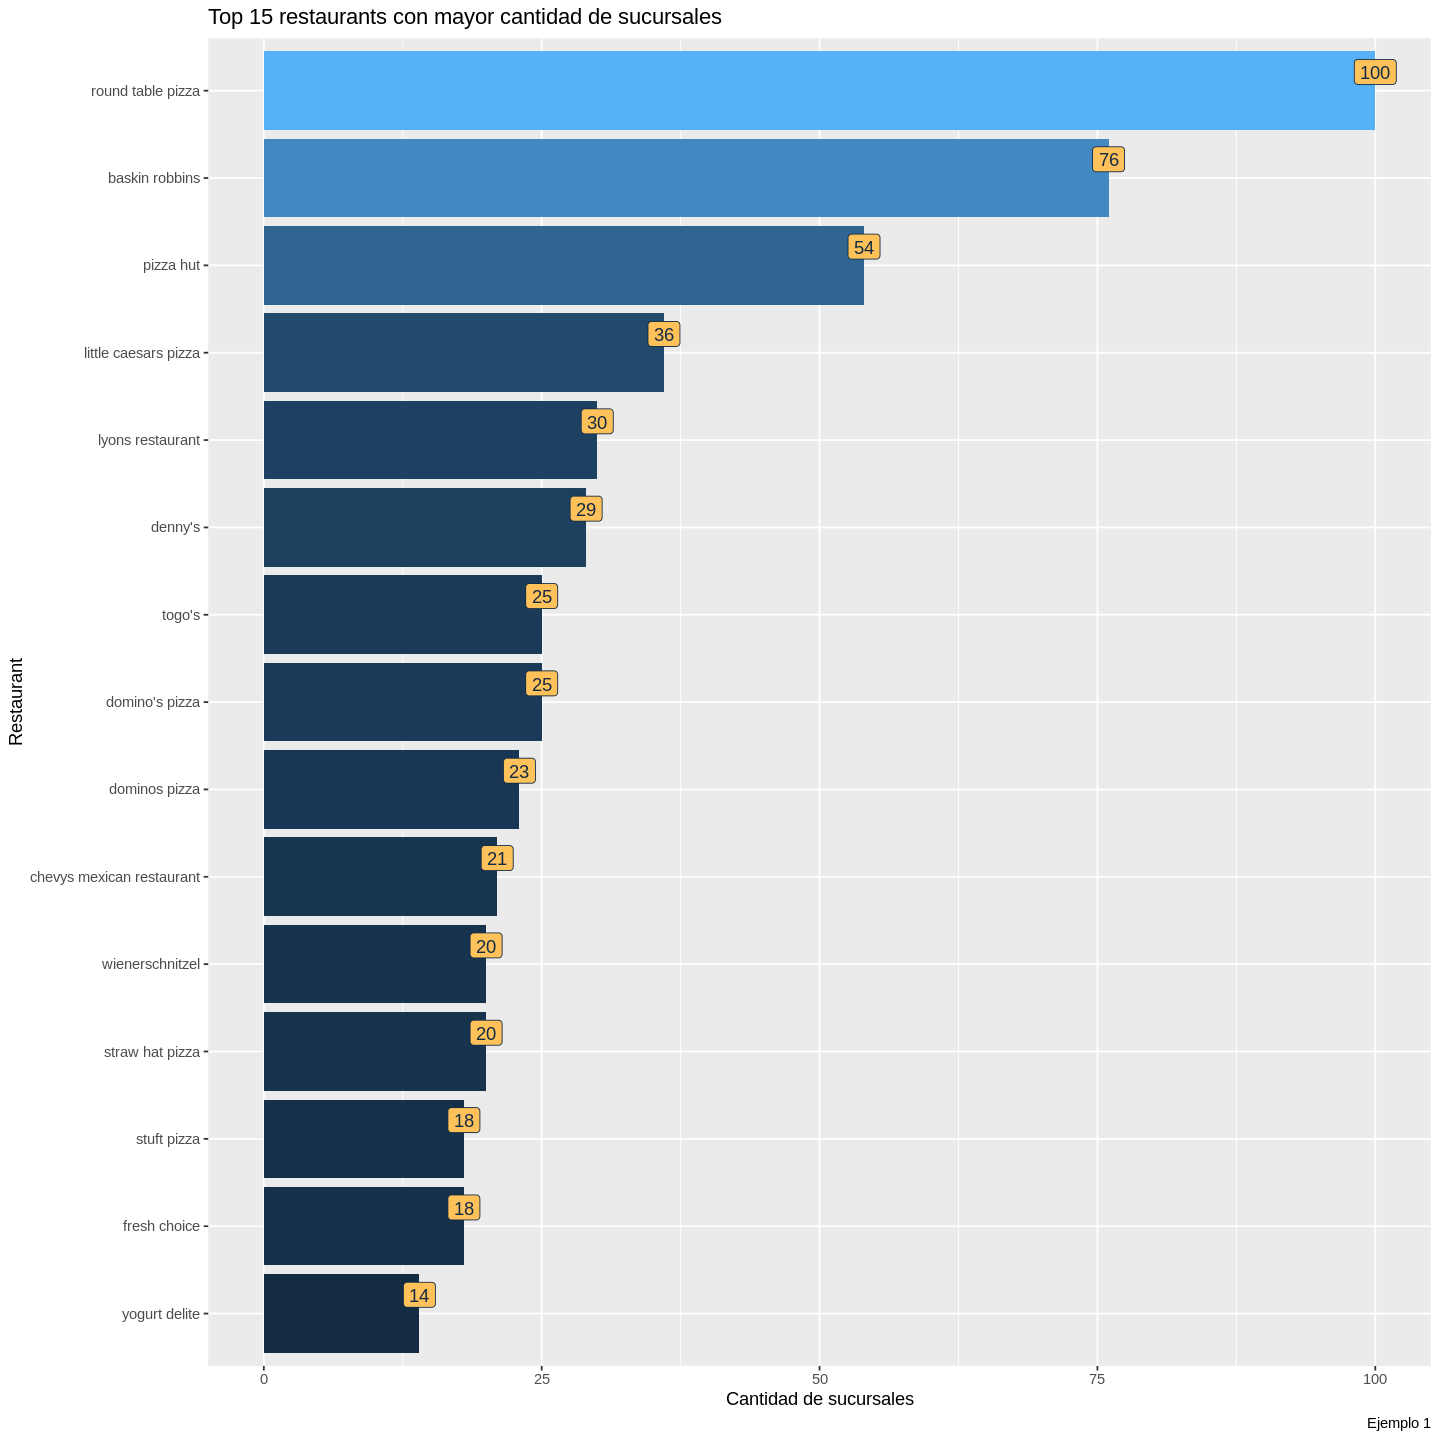 !





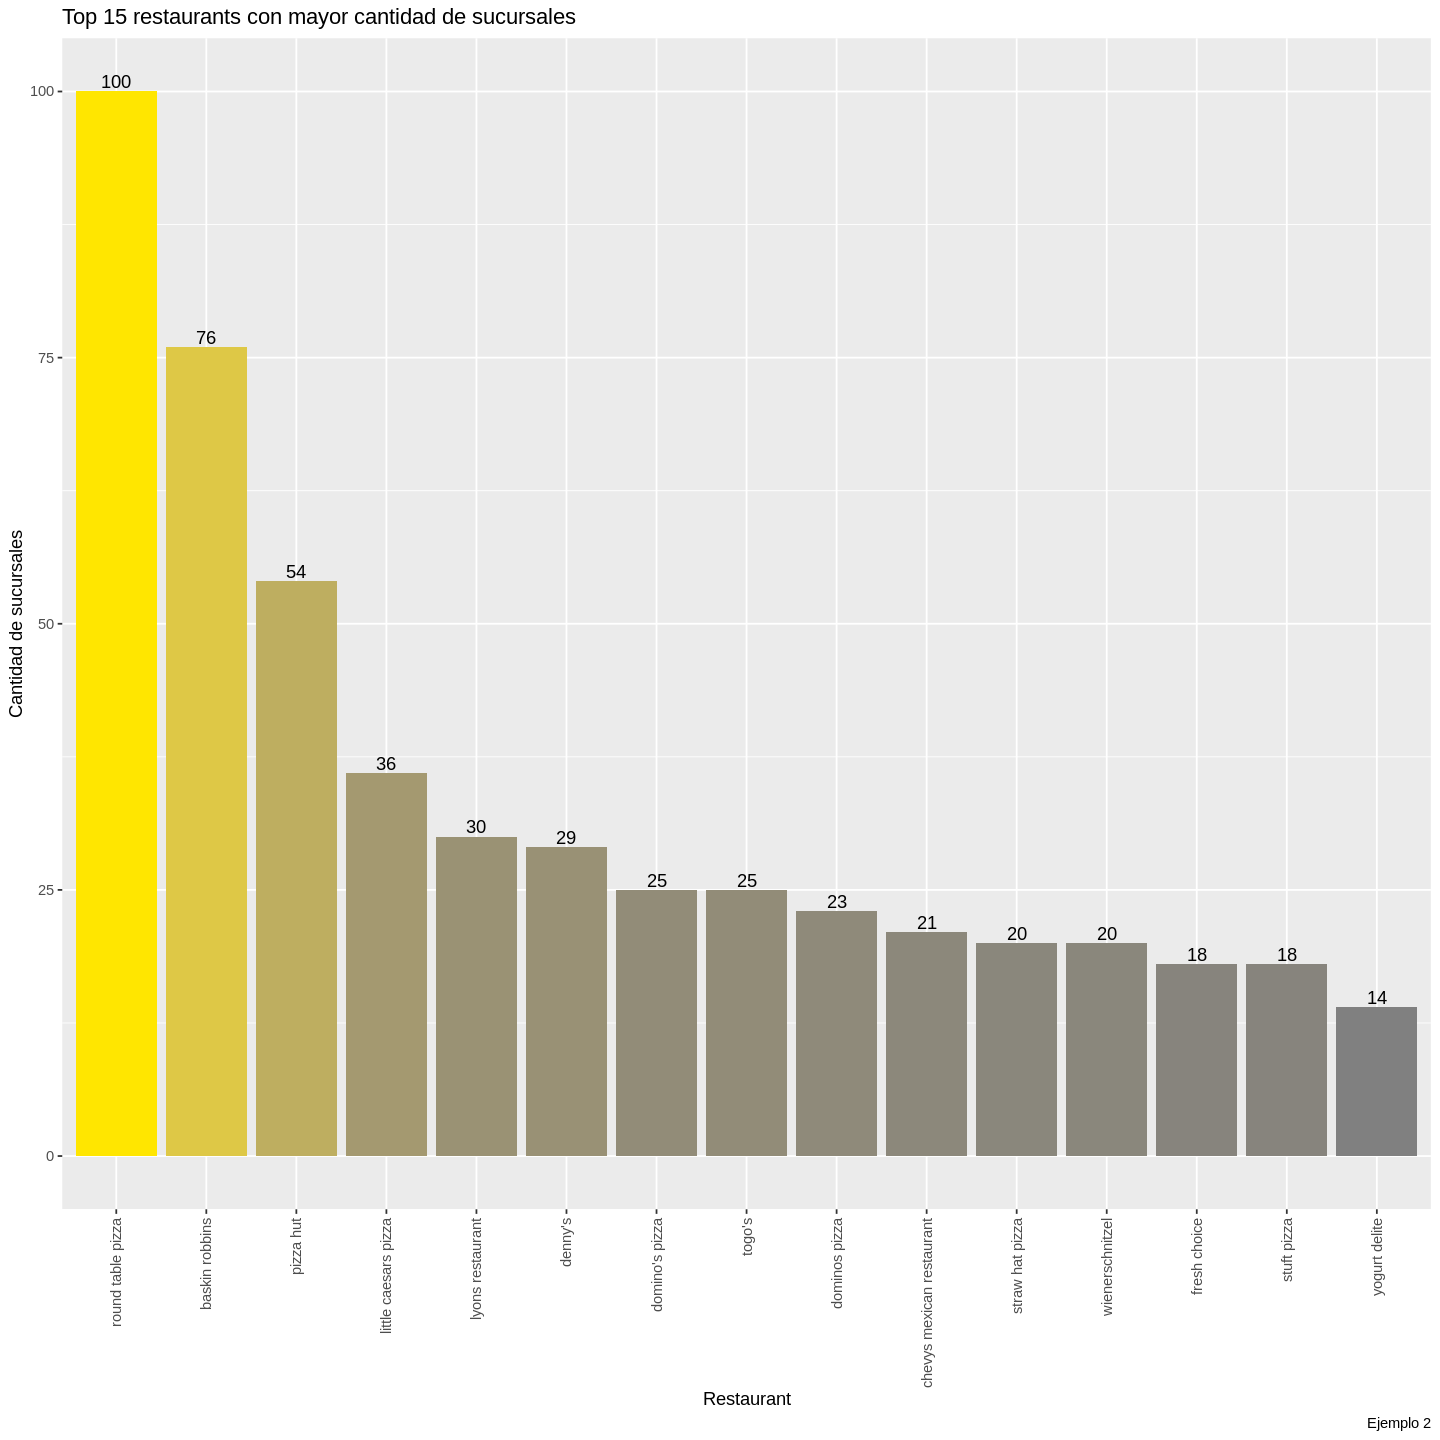



In [ ]:
# P1.3
## Respusta
#a) ---------------------------------------------------------------------
#OPCION 1
general %>%
    left_join(location,by = c("id_restaurant" = "id_rest")) %>%
    group_by(label) %>%
    distinct(city) %>% # dentro de cada "label", se retienen las ciudades distintas.
    summarise(n_city = n()) %>% # se cuenta el total de ciudades distintas
    filter(n_city > 1) %>%
    nrow() #559 restaurants con presencia en más de una ciudad

#OPCION 2
general %>%
    left_join(location,by = c("id_restaurant" = "id_rest")) %>%
    select(label,city) %>%
    distinct() %>% # también se puede utilizar unique()
    count(label) %>%
    filter(n > 1) %>%
    nrow()
#b) ---------------------------------------------------------------------
#mismo código de la parte anterior
general %>%
    left_join(location,by = c("id_restaurant" = "id_rest")) %>%
    group_by(label) %>%
    distinct(city) %>% # dentro de cada "label", se retienen las ciudades distintas.
    summarise(n_city = n()) %>% # se cuenta el total de ciudades distintas
    arrange(-n_city) %>%
    head(1) # baskin robbins con presencia en 49 ciudades

[1] 559

[1] 559

label,n_city
<chr>,<int>
baskin robbins,49


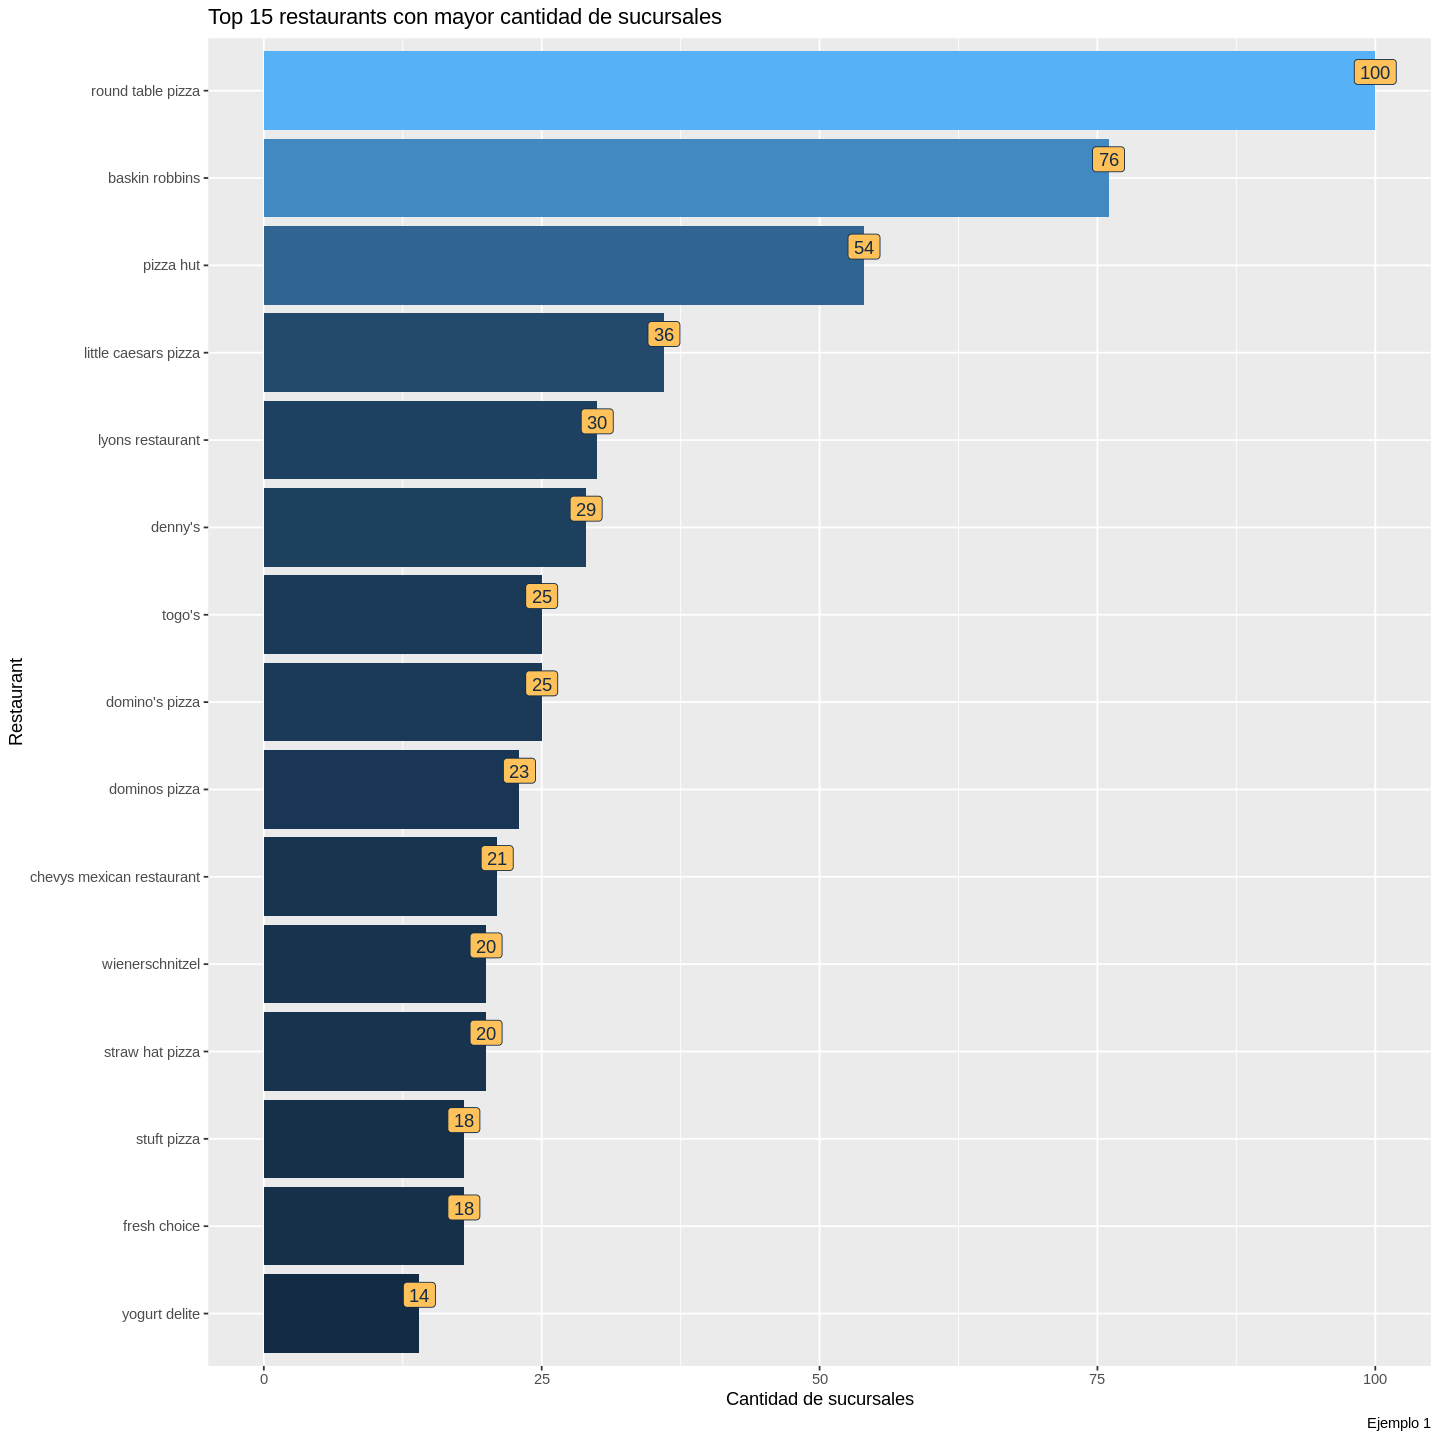

In [ ]:
#c) ---------------------------------------------------------------------
general %>%
  count(label) %>%
  arrange(-n) %>%
  slice(1:15) %>% # o pueden usar head(), o bien generar una columna con el número de fila y luego filtrar
  ggplot() +
  aes(x = reorder(label,n), y = n , fill = n) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  coord_flip() +
  labs(x = "Restaurant",
       y = "Cantidad de sucursales",
       title = "Top 15 restaurants con mayor cantidad de sucursales",
       caption = "Ejemplo 1") +
  geom_label(aes(label = n),
            position = position_dodge(width = .9),
            vjust=-0.25,
            color = "#132B43",fill = "#FFC159")



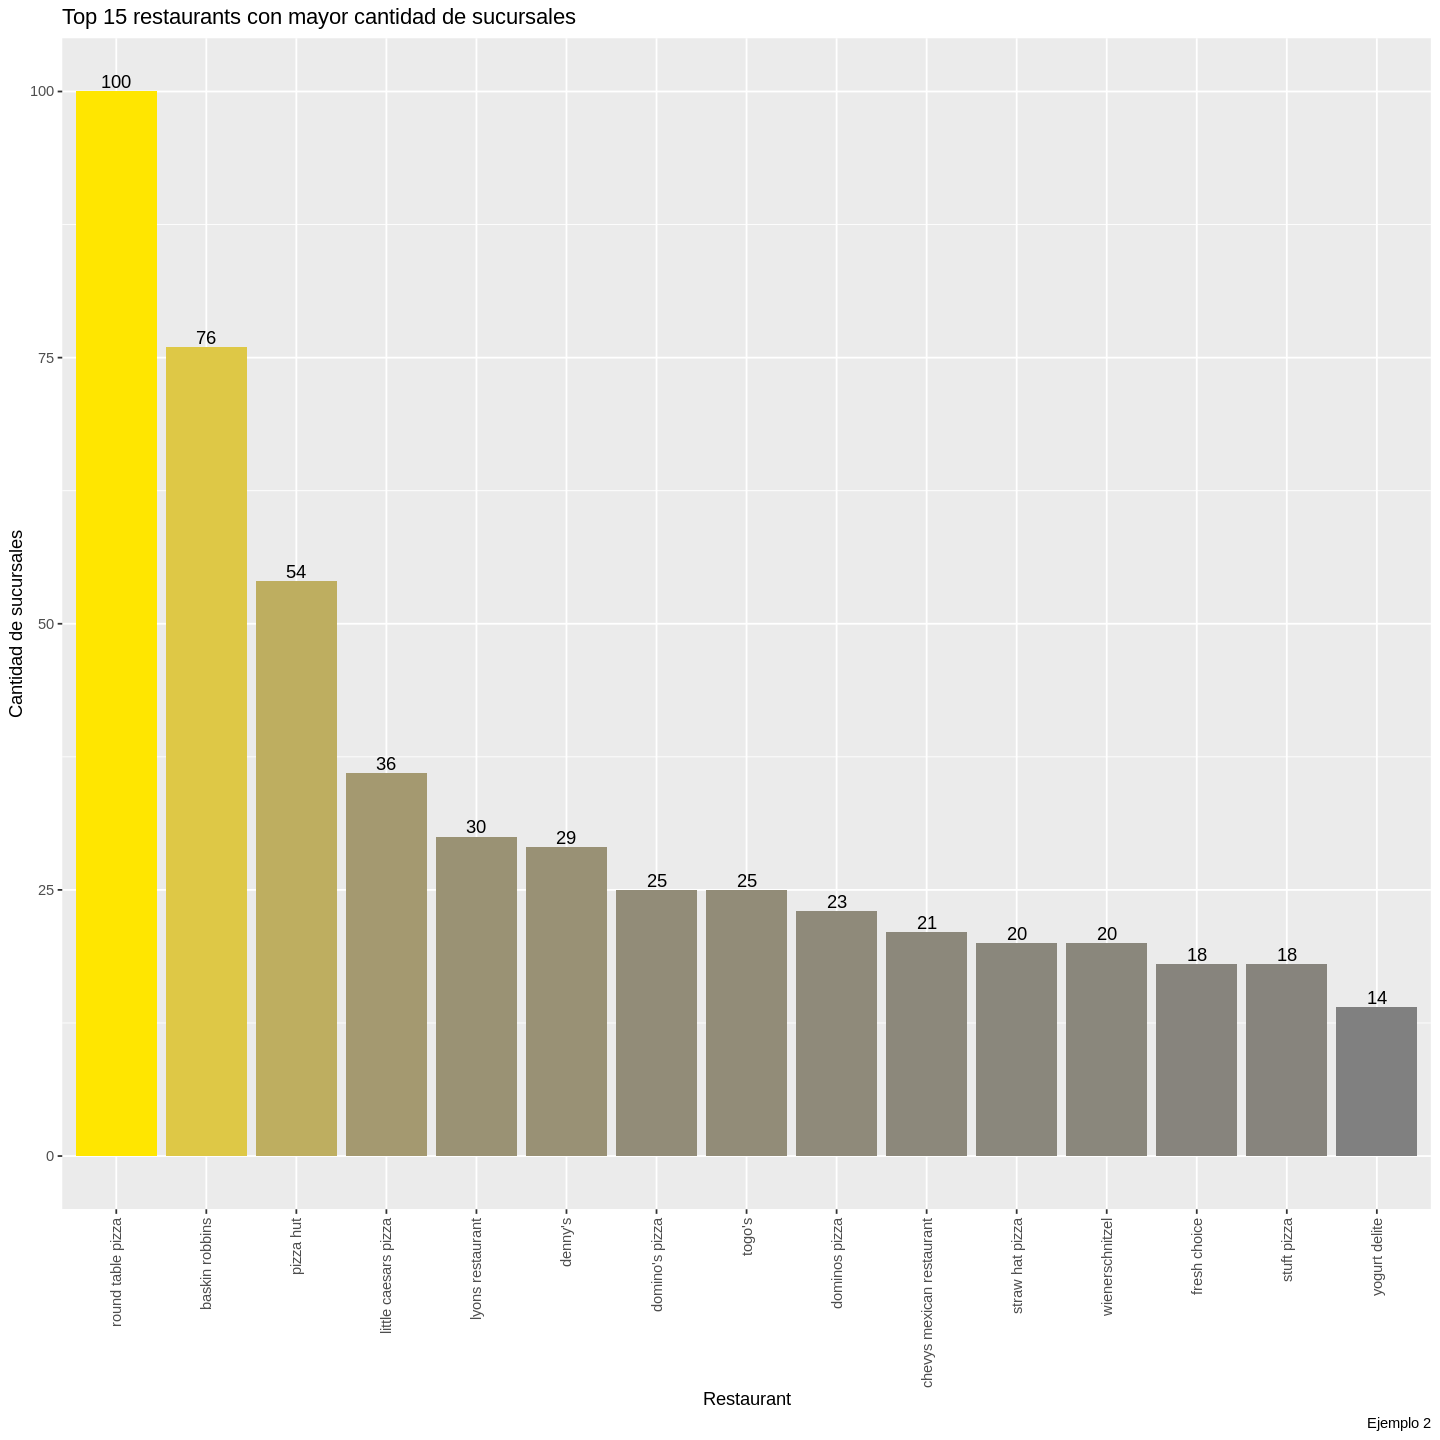

In [ ]:
  general %>%
  count(label) %>%
  arrange(-n) %>%
  slice(1:15) %>% # o pueden usar head(), o bien generar una columna con el número de fila y luego filtrar
  ggplot() +
  aes(x = reorder(label,-n), y = n,fill = n) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  theme(axis.text.x=element_text(angle = 90, vjust = .5,hjust = 1)) +
  labs(x = "Restaurant",
         y = "Cantidad de sucursales",
         title = "Top 15 restaurants con mayor cantidad de sucursales",
         caption = "Ejemplo 2") +
    geom_text(aes(label = n),
               position = position_dodge(width = .9),
               vjust=-0.25) +
    scale_fill_continuous(low = "#808080",
                          high = "#FFE600")

## Preguntas 1.4

**P4a) (4pts)** Genere una tabla llamada `resumen`, que contenga la siguiente información:

 * `city`: Ciudad
 * `food_type`: Tipo de comida
 * `n_rest`: Cantidad de restaurantes por cada ciudad y tipo de comida.
 * `review_prom`: Valoración promedio por cada ciudad y tipo de comida.
 * `total_rest`: Total de restaurantes por cada ciudad (se puede repetir el valor por cada tipo de comida).
 * `review_prom_city`: Valoración promedio de los restaurantes por cada ciudad (se puede repetir el valor por cada tipo de comida).

Su tabla deberá tener la siguiente estructura (la imgen sólo muestra los primeros registros):

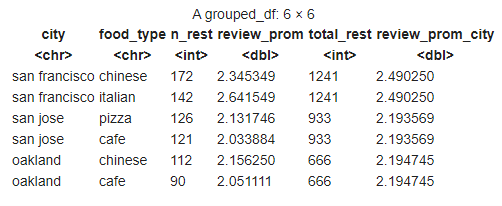

**P4b) (2pts)** Basado en la tabla anterior, construya dos nuevas columnas llamadas `density_food_type` y `ratio_review` que contengan la siguiente información:

 * `density_food_type`: Representa el cuociente entre le total de restaurants por tipo de comida y ciudad, respecto del total de restaurantes de la ciudad. (`n_rest/total_rest`)
 * `ratio_review`: Representa el cociente entre a valoración del restaurant por tipo de comida y ciudad, respecto de la valoración promedio de los resturants de la misma ciudad. (`review_prom/review_prom_city`)

**P4c) (3pts)** Mediante un gráfico de dispersión, muestre la relación entre `density_food_type` y `ratio_review`. Investigue sobre el parámetro `alpha` dentro de la capa geométrica para una mejor visualizaciónd de los puntos. Adicionalmente añada una curva de tendencia y, con base en él, indique si cabe la posibilidad de establecer algún tipo de dependencia entre `density_food_type` y `ratio_review`.


In [ ]:
# P1.4
## Respusta
#a) ---------------------------------------------------------------------
#OPCION 1
resumen_ciudad_tipo <- general %>%
  left_join(location, by = c("id_restaurant" = "id_rest")) %>%
  group_by(city,food_type) %>%
  summarise(n_rest = n(),
            review_prom = mean(review))

resumen_ciudad <- general %>%
  left_join(location, by = c("id_restaurant" = "id_rest")) %>%
  group_by(city) %>%
  summarise(total_rest = n(),
            review_prom_city = mean(review))

resumen <- resumen_ciudad_tipo %>%
    left_join(resumen_ciudad, by = "city") %>%
    arrange(-n_rest)

head(resumen)


`summarise()` has grouped output by 'city'. You can override using the
`.groups` argument.


city,food_type,n_rest,review_prom,total_rest,review_prom_city
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
san francisco,chinese,172,2.345349,1241,2.490250
san francisco,italian,142,2.641549,1241,2.490250
san jose,pizza,126,2.131746,933,2.193569
san jose,cafe,121,2.033884,933,2.193569
oakland,chinese,112,2.156250,666,2.194745
oakland,cafe,90,2.051111,666,2.194745


In [ ]:
#OPCION 2
resumen <- general %>%
  left_join(location, by = c("id_restaurant" = "id_rest")) %>%
  group_by(city,food_type) %>%
  summarise(n_rest = n(),
           review_prom = mean(review)) %>%
  group_by(city) %>%
  mutate(total_rest = sum(n_rest),
        review_prom_city = sum(review_prom * n_rest)/total_rest) %>%
  arrange(-n_rest)

head(resumen)

`summarise()` has grouped output by 'city'. You can override using the
`.groups` argument.


city,food_type,n_rest,review_prom,total_rest,review_prom_city
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
san francisco,chinese,172,2.345349,1241,2.490250
san francisco,italian,142,2.641549,1241,2.490250
san jose,pizza,126,2.131746,933,2.193569
san jose,cafe,121,2.033884,933,2.193569
oakland,chinese,112,2.156250,666,2.194745
oakland,cafe,90,2.051111,666,2.194745


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


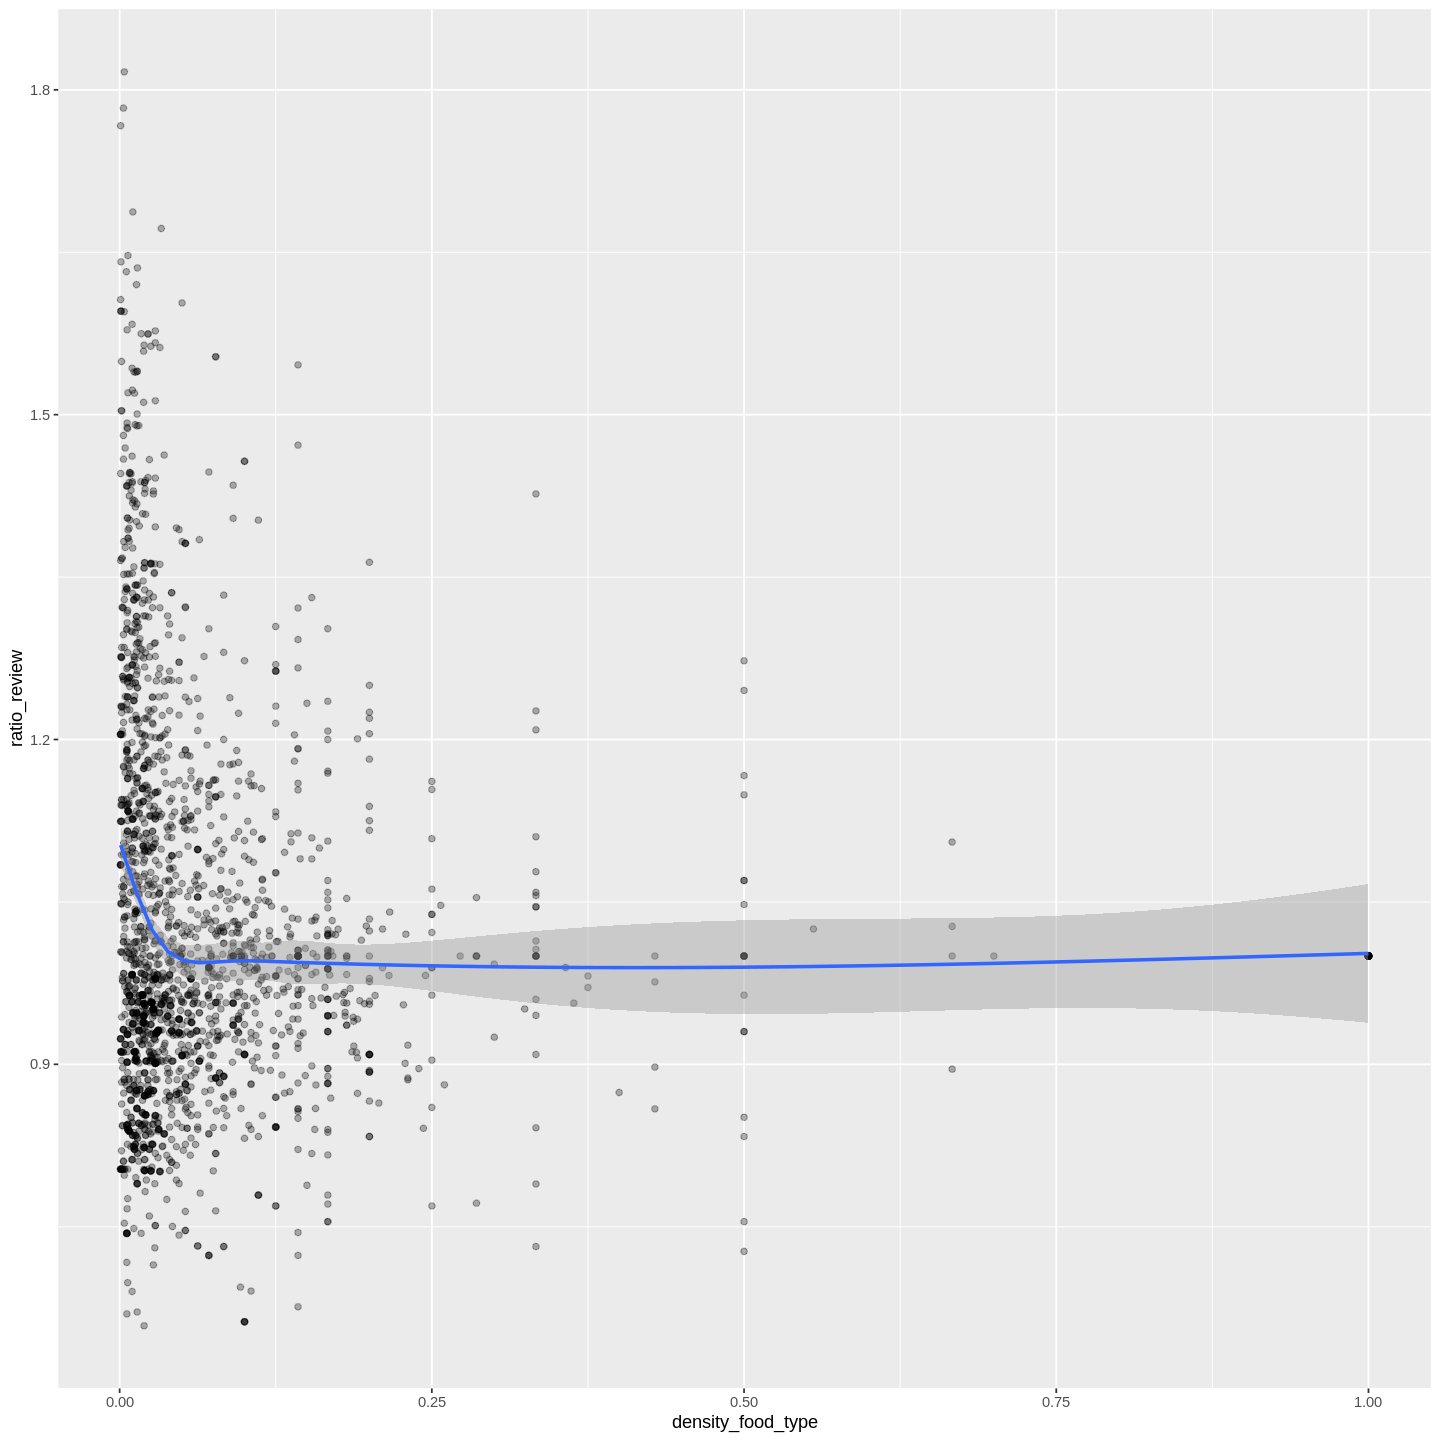

In [ ]:
#b) ---------------------------------------------------------------------
resumen <- resumen %>%
    mutate(
        density_food_type = n_rest/total_rest,
        ratio_review = review_prom/review_prom_city
    )

#c) ---------------------------------------------------------------------
resumen %>%
    ggplot() +
    aes(x = density_food_type , y = ratio_review) +
    geom_point(alpha = 0.3) +
geom_smooth()
# según el gráfico, no se aprecia ningún tipo de dependencia entre ambas variables.

## Preguntas 1.5
**P5a) (3pts)** En la tabla `resumen` creada en **P4a)**, genere una nueva columna llamada `type_review`, que contenga "review alto", si `ratio_review >= 1` y "review bajo"  `ratio_review < 1`. ¿Qué indica esta variable? Comente.  <br>
**P5b) (3pts)** Para cada `type_review`, muestre a través de un gráfico de cajas (boxplot), la distribución de la densidad del tipo de comida`density_food_type`. ¿Qué puede observar?<br>

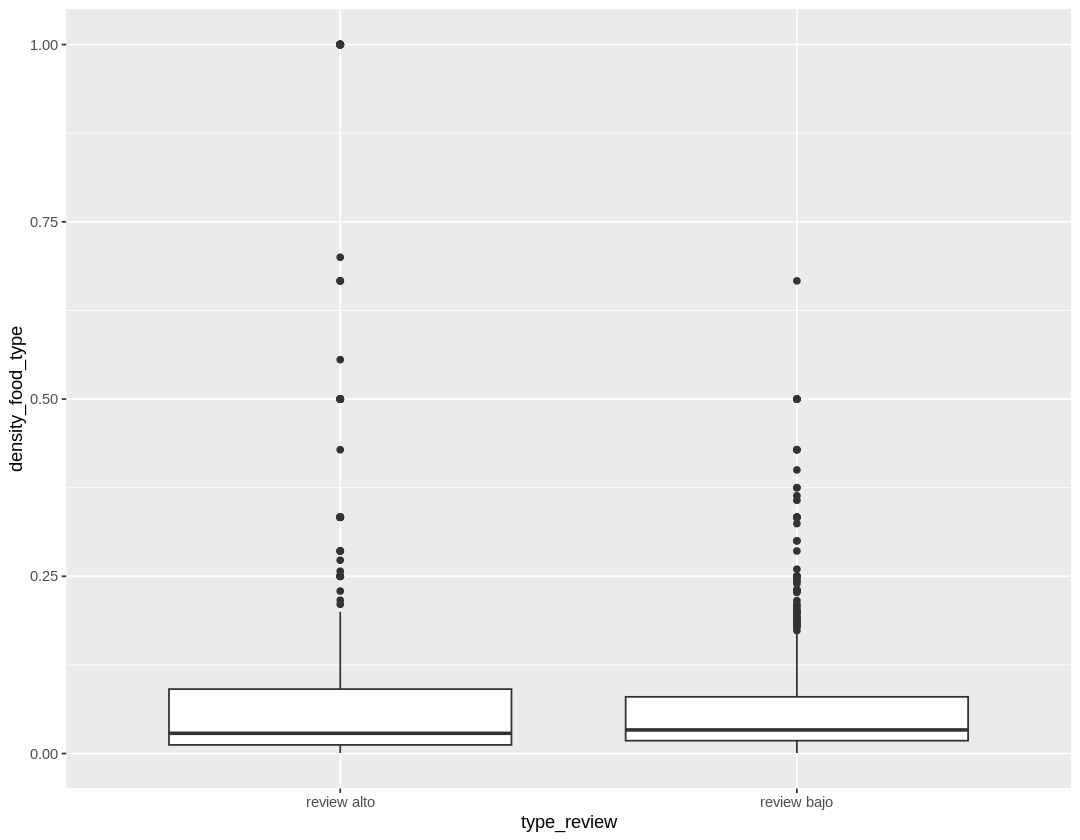

In [ ]:
#########
## Esto  no es necesaria en Rstudio, es sólo para modificar el tamaño de los gráficos desplegados en el notebook
library(repr)
options(repr.plot.width=9, repr.plot.height = 7)
#########

# P1.5
## Respusta
#a) ---------------------------------------------------------------------
resumen <- resumen %>%
    mutate(type_review = ifelse(ratio_review >= 1, "review alto", "review bajo"))
#b) ---------------------------------------------------------------------
resumen %>%
    ggplot() +
    aes(x = type_review , y = density_food_type) +
    geom_boxplot()
# se puede observar que la mediana de density_food_type es levemente mayor para los casos con review alto (aunque quizá sea despreciable dicha diferencia). Además los casos con review bajo, aparentemente muestran una menor dispersión.




